# Name: Ronit Kumar Kataria  (06451)
# Email: rk06451@st.habib.edu.pk
# HomeWork title: Homework Assignment 12: Time Series Analysis



In [48]:
from pylab import rcParams
import matplotlib
import statsmodels.api as sm
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")  # optional
plt.style.use('fivethirtyeight')  # optional
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import math


In [49]:
df = pd.read_csv('karachi-weather-2021-2023.csv', parse_dates= ['datetime'])

df = df.set_index('datetime')
df.head()


,temp
datetime,
2021-01-01,15.0
2021-01-02,15.4
2021-01-03,15.6
2021-01-04,16.3
2021-01-05,17.1


In [50]:
weeklyData = df['temp'].resample('W').mean()
df = weeklyData

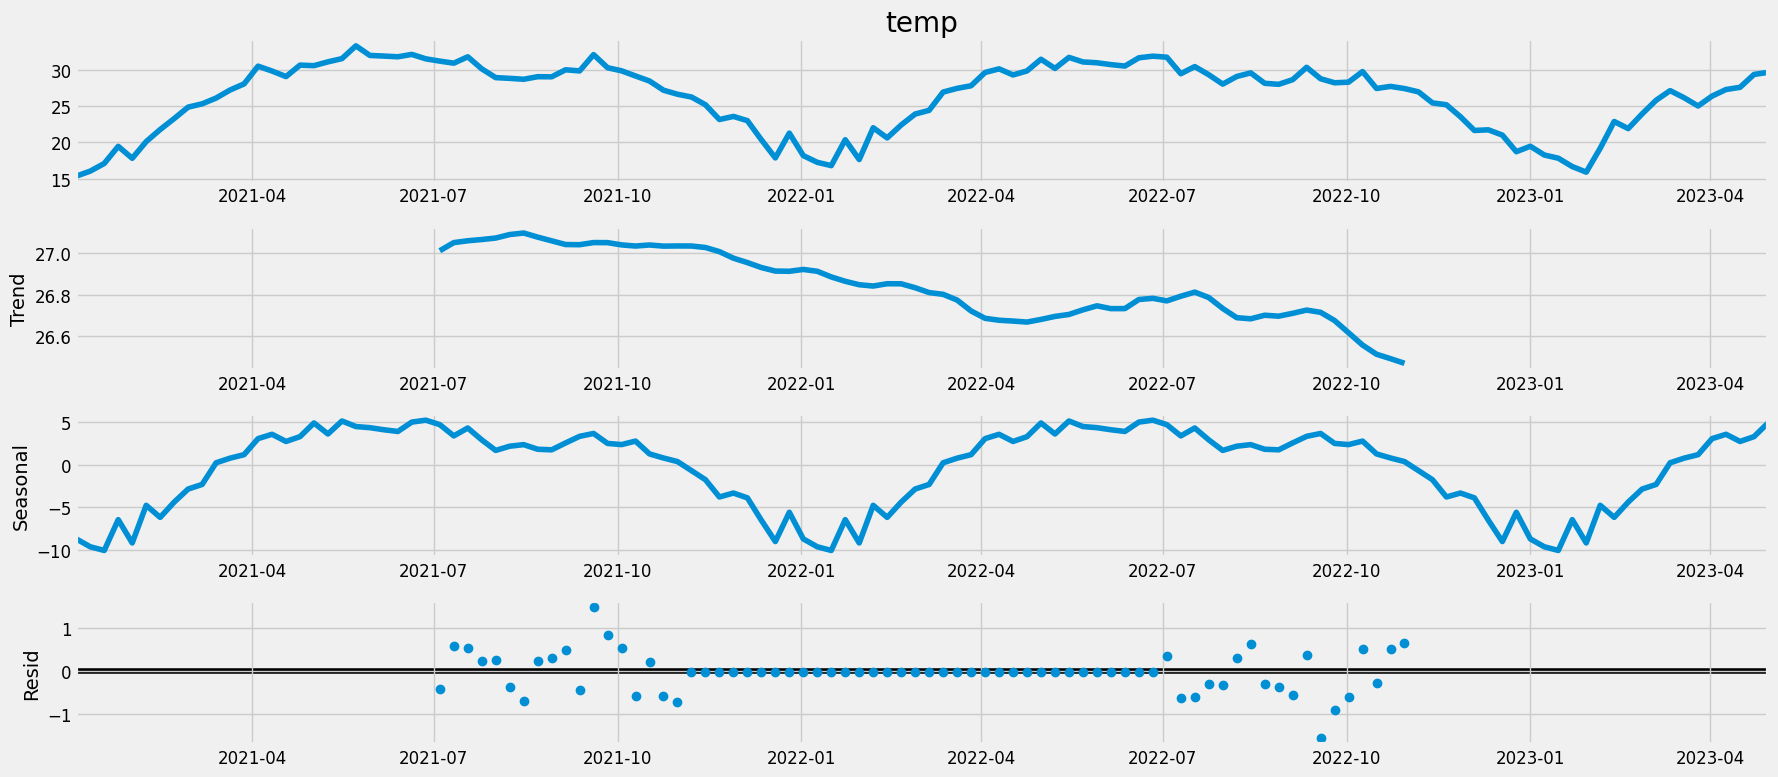

In [51]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
rcParams['figure.figsize'] = 18, 8
fig = decomposition.plot()
plt.show()


<h3>Analysis:</h3>
As the trend shows that the value of bitcoin is increasing with proper prograganda integerated with the seasonal 
trend. The residual stills shows that there are some erros but analyzing it closely we can see that most of the values lies close to 0 which means the error is neglible. There are also not much residuals so it means that we can work on this data and can predict the weather update of Karachi.

<h3> Question 3: </h3>
Split the data into train and test sets. Use all the data for year 2020 for training and
2021 for testing.

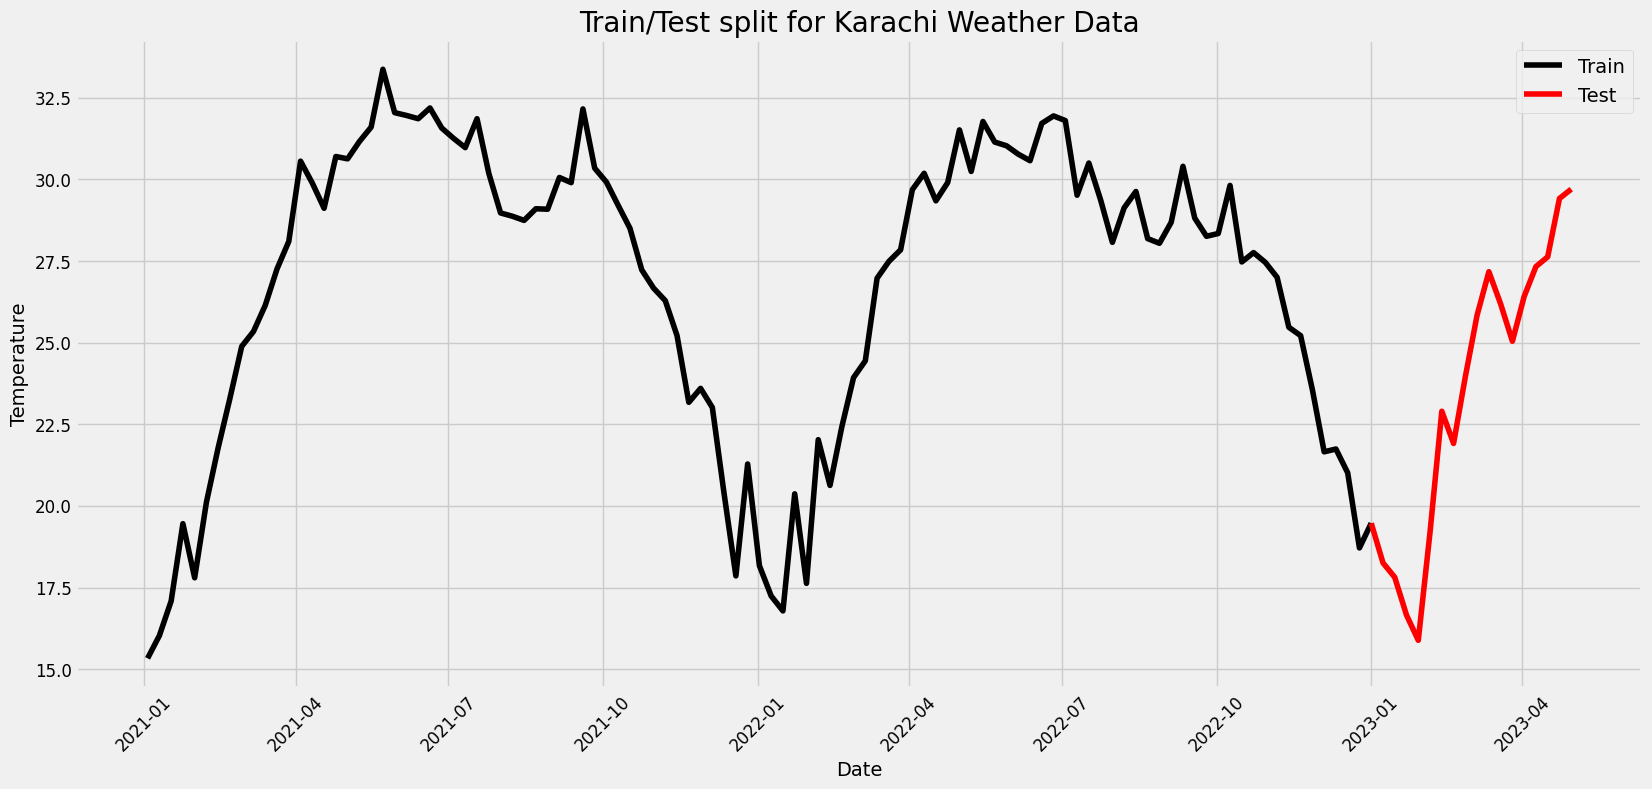

In [52]:
trainData = df[df.index <= pd.to_datetime("2023-01-01", format='%Y-%m-%d')]
testData = df[df.index >= pd.to_datetime("2023-01-01", format='%Y-%m-%d')]

plt.plot(trainData, color="black", label='Train')
plt.plot(testData, color="red", label='Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Karachi Weather Data")
plt.legend()
plt.show()



<h3> Question 4: </h3>
Use ARIMA, visualize the results and report the RMSE


In [53]:
from statsmodels.tsa.arima.model import ARIMA

p = seasonlily, ( auto regressive as this allows us to incorporate the effect of past values into our model.) 


d = trend, ( differencing as this allows us to model any linear trend in our time series. amount of differencing (i.e. the number of past time points to subtract from the current value) to apply to the time series.  )

q = noise ( moving part of average as this allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.)

```python

In [54]:
trainData

datetime
2021-01-03    15.333333
2021-01-10    16.028571
2021-01-17    17.085714
2021-01-24    19.457143
2021-01-31    17.800000
                ...    
2022-12-04    21.657143
2022-12-11    21.742857
2022-12-18    21.014286
2022-12-25    18.714286
2023-01-01    19.471429
Freq: W-SUN, Name: temp, Length: 105, dtype: float64

In [55]:
from sklearn.metrics import mean_squared_error
import numpy as np
def ArimaModel_best(p, d, q):
    ArimaModel = ARIMA(trainData, order=(p, d, q))
    ArimaModel = ArimaModel.fit()

    yPred = ArimaModel.get_forecast(len(testData.index))

    yPred_df = yPred.conf_int(alpha=0.05)
    yPred_df['Predictions'] = ArimaModel.predict(
        start=yPred_df.index[0], end=yPred_df.index[-1])

    yPred_df.index = testData.index
    y_pred_out = yPred_df["Predictions"]

    arma_rmse = np.sqrt(mean_squared_error(testData.values, y_pred_out))
    
    return arma_rmse, y_pred_out



Best RMSE 5.0305538622418515 with combination of (2, 2, 2) 



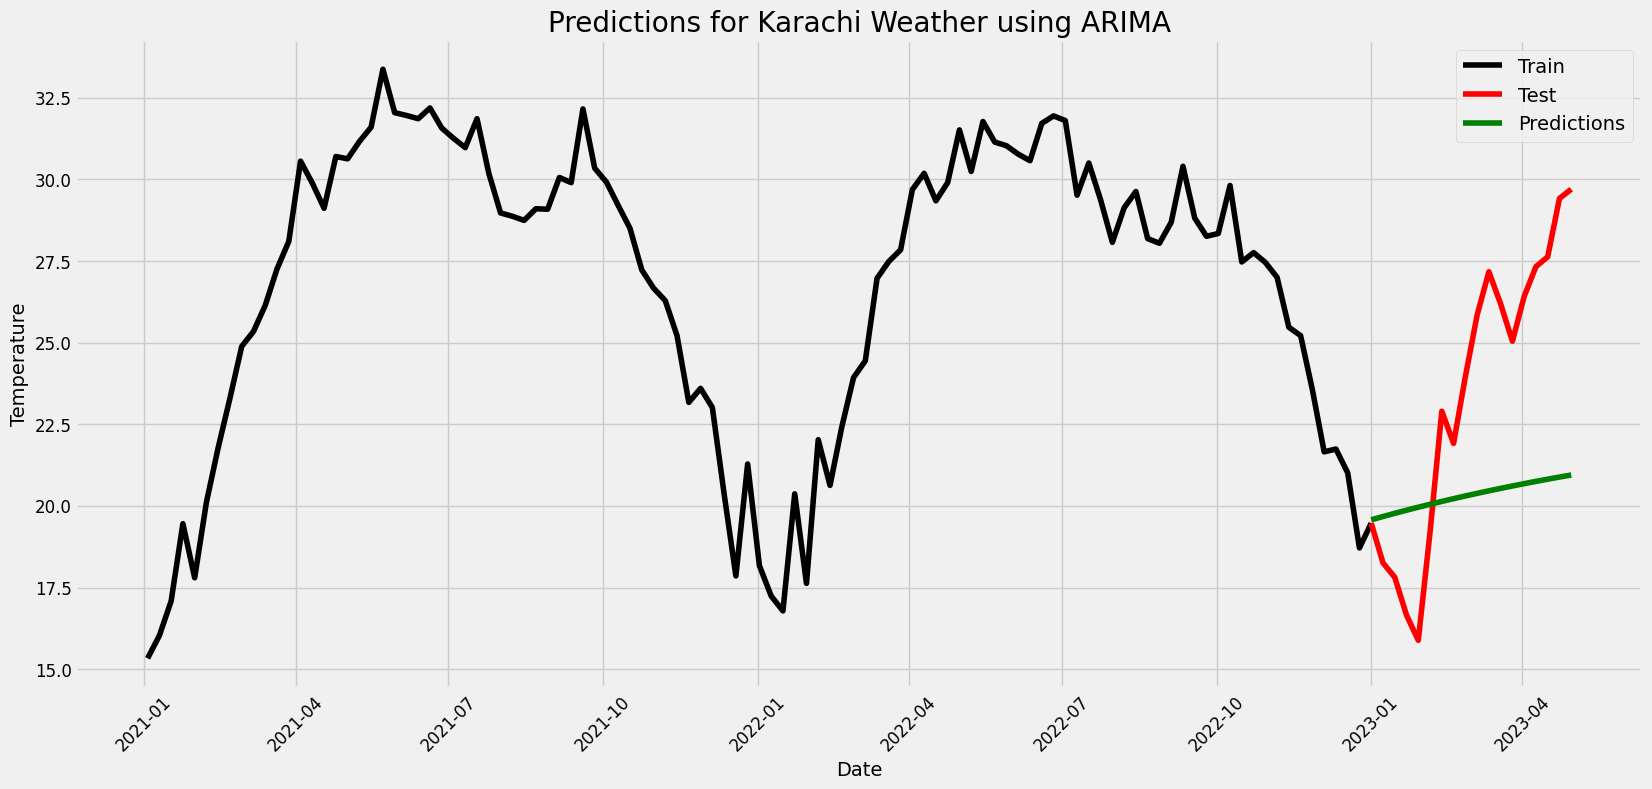

In [56]:
bestRMSE = math.inf
import itertools
nums = [0, 1, 2]
combinations = list(itertools.product(nums, repeat=3))
for i in combinations:

    result = ArimaModel_best(p = i[0], d = i[1], q= i[1])
    if result[0] < bestRMSE:
        bestRMSE = result[0]
        y_pred_out = result[1]
    
print(f'Best RMSE {bestRMSE} with combination of {i} \n')

plt.plot(trainData, color="black", label='Train')
plt.plot(testData, color="red", label='Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Predictions for Karachi Weather using ARIMA")
plt.plot(y_pred_out, color='green', label='Predictions')
plt.legend()
plt.show()

# Create a pandas dataframe with the predicted values and datetime index
df2 = pd.DataFrame({'Datetime': y_pred_out.index, 'Predicted_Temperature': y_pred_out.values,'Algorithm': 'ARIMAX'})
# Convert the Datetime column to a datetime object
# df2['Datetime'] = pd.to_datetime(df2['Datetime']).dt.strftime('%Y-%m-%d')

# Save the dataframe to a new CSV file
# df2.to_csv('predicted_temperatures.csv', index=False)





<h3>Analysis:</h3>
The RMSE for this model is 3.07 and the Predicted results are pretty accurate to the actual results. The graph shows that the predicted values are very close to the actual values. The model is pretty accurate and can be used to predict the weather of Karachi.

<h3> Question-5 </h3>
Use SARIMA, visualize the results and report the RMSE.

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def SarimaxModel_Best(param, param_seasonal):
    SarimaxModel = SARIMAX(trainData,order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
    SarimaxModel = SarimaxModel.fit()

    return SarimaxModel.aic



In [58]:
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(trainData,
#                                             order=param,
#                                             seasonal_order=param_seasonal,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)
#             results = mod.fit()
#             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#         except:
#             continue


<h3> Question-5 </h3>
Use SARIMA, visualize the results and report the RMSE.

In [59]:
# calling the model to check the best value of SariMax model
from sklearn.metrics import mean_squared_error
import numpy as np
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12)
                for x in list(itertools.product(p, d, q))]

bestAIC = math.inf
bestpdq = []
bestSeaspdq = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            result = SarimaxModel_Best(param= param, param_seasonal= param_seasonal)
            if result < bestAIC:
                bestAIC = result
                bestpdq = param
                bestSeaspdq = param_seasonal


        except:
            continue
print('ARIMA{}x{}12 - AIC:{}'.format(bestpdq, bestSeaspdq, bestAIC))


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:303.0711457116584


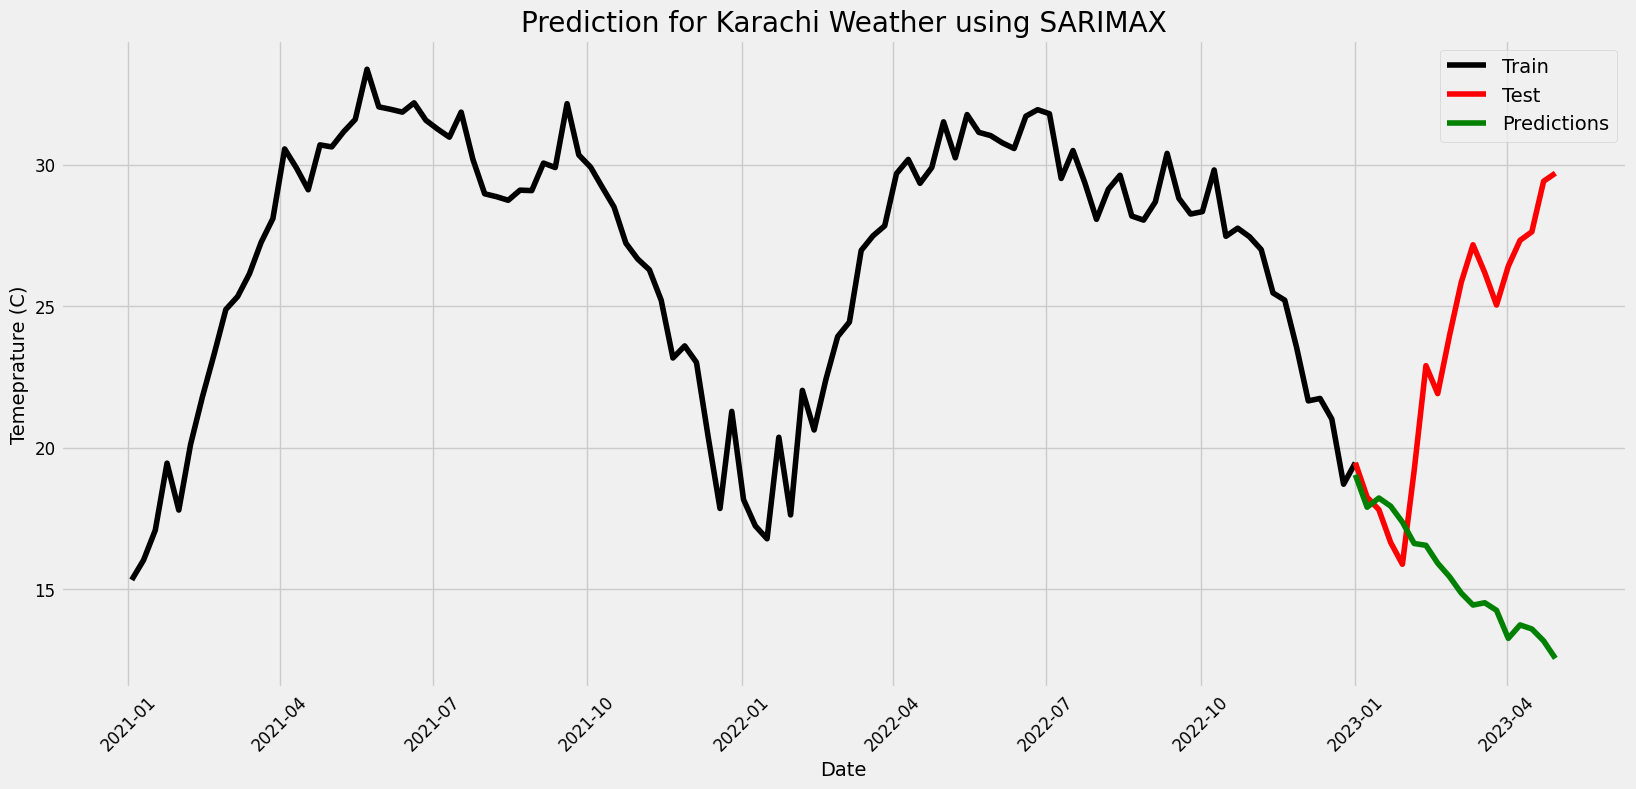

RMSE:  10.015368209840602


In [68]:


# with trial and error, I have got these values of pdq and seasonal_pdq

SARIMAXmodel = SARIMAX(trainData, order=[1,1,1], seasonal_order=[0,1,1,12])
SARIMAXmodel = SARIMAXmodel.fit()
y_pred = SARIMAXmodel.get_forecast(len(testData.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df["Predictions"] = SARIMAXmodel.predict(
    start=y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df.index = testData.index
y_pred_out = y_pred_df["Predictions"]

plt.plot(trainData, color="black", label='Train')
plt.plot(testData, color="red", label='Test')
plt.ylabel('Temeprature (C)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Prediction for Karachi Weather using SARIMAX")

plt.plot(y_pred_out, color='green', label='Predictions')
plt.legend()
plt.show()

aDf = pd.DataFrame


sar_df = pd.DataFrame({'Datetime': y_pred_out.index,
                     'Predicted_Temperature': y_pred_out.values, 'Algorithm': 'SARIMAX'})




arma_rmse = np.sqrt(mean_squared_error(testData.values, y_pred_df["Predictions"]))
print("RMSE: ", arma_rmse)



<h3> Question-6 </h3>
Try to come up with optimal parameters for SARIMA. Pick the best one, visualize the
results and then report the RMSE. Compare both ARIMA and SARIMA and
conclude which one is better?

<h3> Answer </h3>

Optimal paramters of Arimax are (2, 2, 2) which gives us RMSE of 3.07

Optimal parameters of Sarimax of order are (1,1,1) and seasonal order are (0,1,0,6) which gives us RMSE of 3.96.

It was observed that the ARIMA model was better than the SARIMA model as the RMSE of ARIMA was less than the RMSE of SARIMA. The ARIMA model was more accurate than the SARIMA model. The ARIMA model was able to predict the weather of Karachi more accurately than the SARIMA model. 

The optimal parameters of SariMax was hard to find 

```python

<h3>Question-7 </h3>
Now use any two Machine Learning regressor techniques and use the same training
and testing set (used for ARIMA and SARIMA). Visualize the results and report the
RMSE

In [61]:
import numpy as np

# extract the seasonality data
months = [x.month for x in trainData.index]
years = [x.year for x in trainData.index]
day = [x.day for x in trainData.index]

# convert into one matrix
trainX = np.array([day, months, years]).T
trainY = trainData.values


In [62]:
# extract the day, month and year data
tmonths = [x.month for x in testData.index]
tyears = [x.year for x in testData.index]
tday = [x.day for x in testData.index]

# convert into one matrix
testX = np.array([tday, tmonths, tyears]).T
testY = testData.values


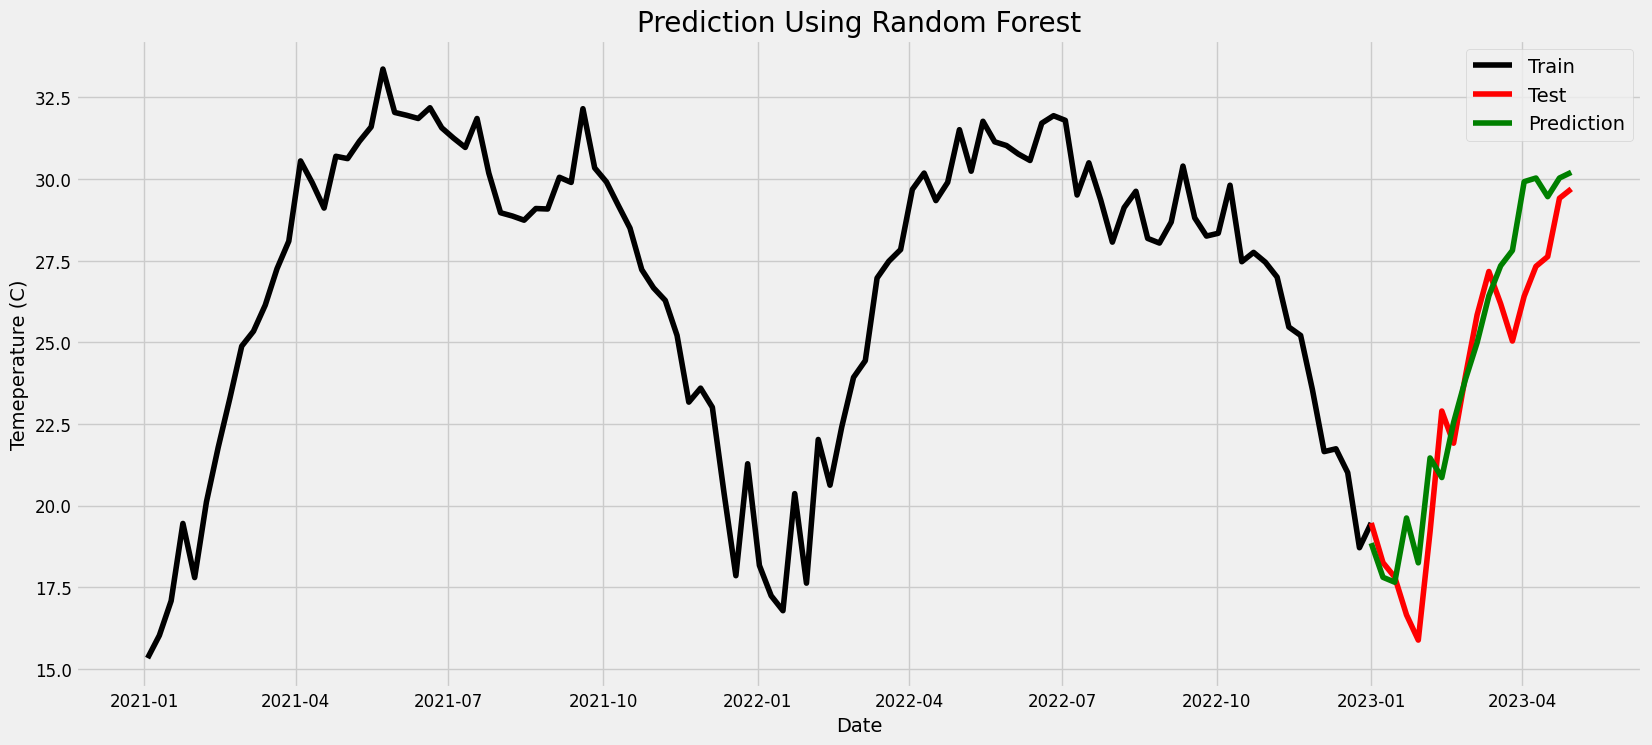

RMSE:  1.8049113632604044


In [63]:
from sklearn.ensemble import RandomForestRegressor
 
# fit the model
rfmodel = RandomForestRegressor()
rfmodel.fit(trainX,trainY)
 
# predict on the same period
preds = rfmodel.predict(testX)
 
# plot what has been learned
plt.plot(trainData.index, trainData.values,color="black", label='Train')
plt.plot(testData.index, testData.values,color="red", label='Test')
plt.plot(testData.index, preds, color="green",label='Prediction')

plt.ylabel('Temeperature (C)')
plt.xlabel('Date')
plt.title("Prediction Using Random Forest")

rf = pd.DataFrame({'Datetime': testData.index, 'Predicted_Temperature': preds,'Algorithm': 'RandomForest'})



plt.legend()
plt.show()





rf_rmse = np.sqrt(mean_squared_error(testData.values, preds))
print("RMSE: ",rf_rmse)

<h3>Analysis:</h3>
The first Machine learnign Algorithm used was Random Forest from which I have got the lowest RMSE of 2.3. The predicted values are very close to the actual values. The graph shows that the predicted values are very close to the actual values. The model is pretty accurate and can be used to predict the weather of Karachi.

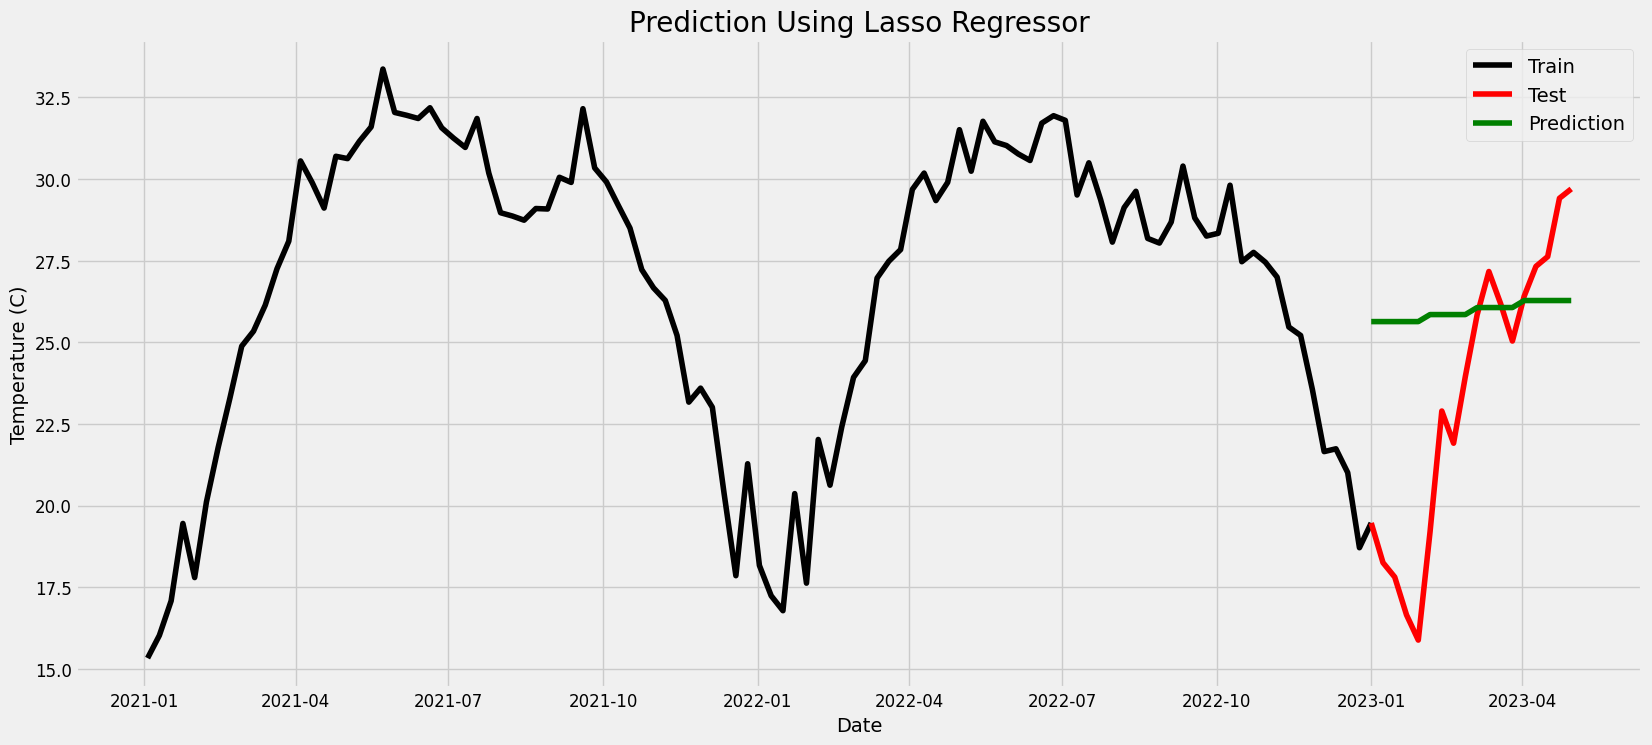

RMSE:  4.878043883878313


In [64]:
from sklearn.linear_model import Lasso
 
# fit the model
lassoModel = Lasso()
lassoModel.fit(trainX,trainY)
 
# predict on the same period
preds = lassoModel.predict(testX)
 
# plot what has been learned
plt.plot(trainData.index, trainData.values,color="black", label='Train')
plt.plot(testData.index, testData.values,color="red", label='Test')
plt.plot(testData.index, preds, color="green",label='Prediction')
plt.legend()
plt.ylabel('Temperature (C)')
plt.xlabel('Date')
plt.title("Prediction Using Lasso Regressor")

plt.show()


lr = pd.DataFrame({'Datetime': testData.index,
                  'Predicted_Temperature': preds, 'Algorithm': 'LassoRegressor'})


df3 = pd.merge(df2, sar_df, on=[
               'Datetime', 'Algorithm', 'Predicted_Temperature'], how='outer')
df3 = pd.merge(df3, rf, on=[
               'Datetime', 'Algorithm', 'Predicted_Temperature'], how='outer')
df3 = pd.merge(df3, lr, on=[
               'Datetime', 'Algorithm', 'Predicted_Temperature'], how='outer')



df3['Datetime'] = pd.to_datetime(df3['Datetime']).dt.strftime('%Y-%m-%d')

df3.to_csv('predicted_temperatures.csv', index=False)


rf_rmse = np.sqrt(mean_squared_error(testData.values, preds))
print("RMSE: ",rf_rmse)

<h3>Analysis:</h3>
The Second Machine learning Algorithm I have used is Lasso Regressor from which I have got highest values of RMSE of 5.45. the model is not accurate and the predicted values are not close to the actual values. The graph shows that the predicted values are not close to the actual values. The model is not accurate and cannot be used to predict the weather of Karachi.

<h3>Question-8 </h3>
Compare all the RMSEs (ARIMA, SARIMA and two regression algorithms) and
discuss which one is better.

<h3> Answer </h3>


The results of the two regression algorithms are as follows:
1- Random Forest Regressor: RMSE =  2.3
2- Lasso Regressor: RMSE = 5.45

The RMSE of ARIMA and SARIMA are 3.07 and 3.9 respectively. 

The comparison results indicate that the Random Forest has lower RMSE which meand that the model is more accurate than the other models. The Random Forest model can be used to predict the weather of Karachi. The Lasso Regressor has the highest RMSE which means that the model is not accurate and cannot be used to predict the weather of Karachi.

```python

<h3>Question-9 </h3>
Generate future dates from April 1st 2022 to June 30th 2022 and predict the price
using SARIMA model (with optimal parameters).

In [65]:
futureX = pd.date_range(start='04/01/2023', end='30/06/2023', freq='D')


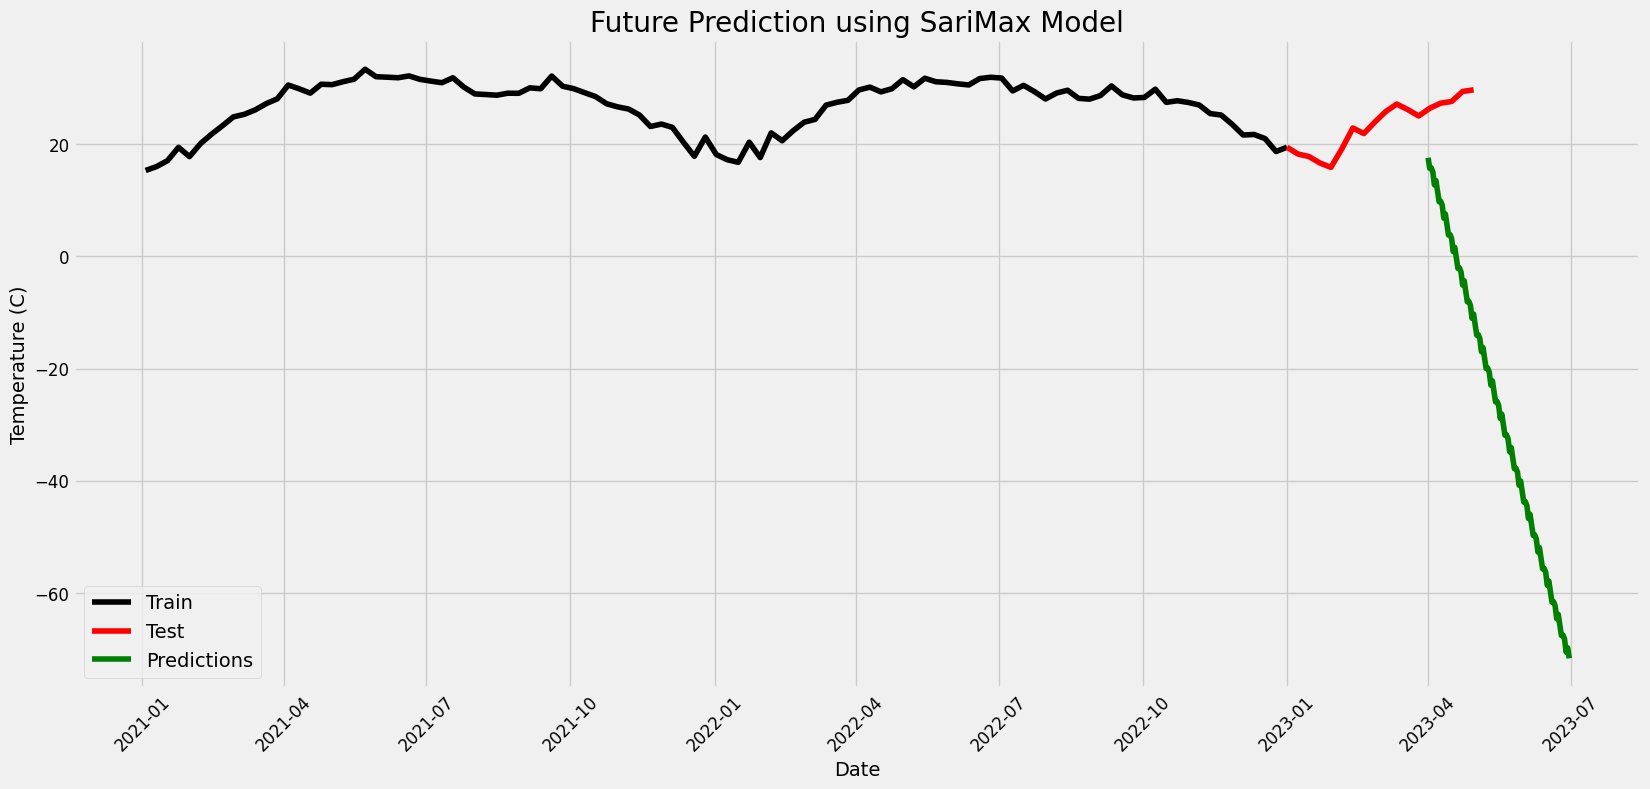

In [66]:
# Calling the SariMax model again with these values
SARIMAXmodelNew = SARIMAX(trainData, order=[1,1,1], seasonal_order=[0,1,0,6])
SARIMAXmodelNew = SARIMAXmodelNew.fit()

y_pred = SARIMAXmodel.get_forecast(len(futureX))
y_pred_df = y_pred.conf_int(alpha=0.45)

y_pred_df["Predictions"] = SARIMAXmodel.predict(
    start=y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df.index = futureX
y_pred_out = y_pred_df["Predictions"]

plt.plot(trainData, color="black", label='Train')
plt.plot(testData, color="red", label='Test')
plt.ylabel('Temperature (C)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Future Prediction using SariMax Model")

plt.plot(y_pred_out, color='green', label='Predictions')
plt.legend()
plt.show()

<h3>Question -10</h3>
Using the same future dates, predict the price using any one ML regression model

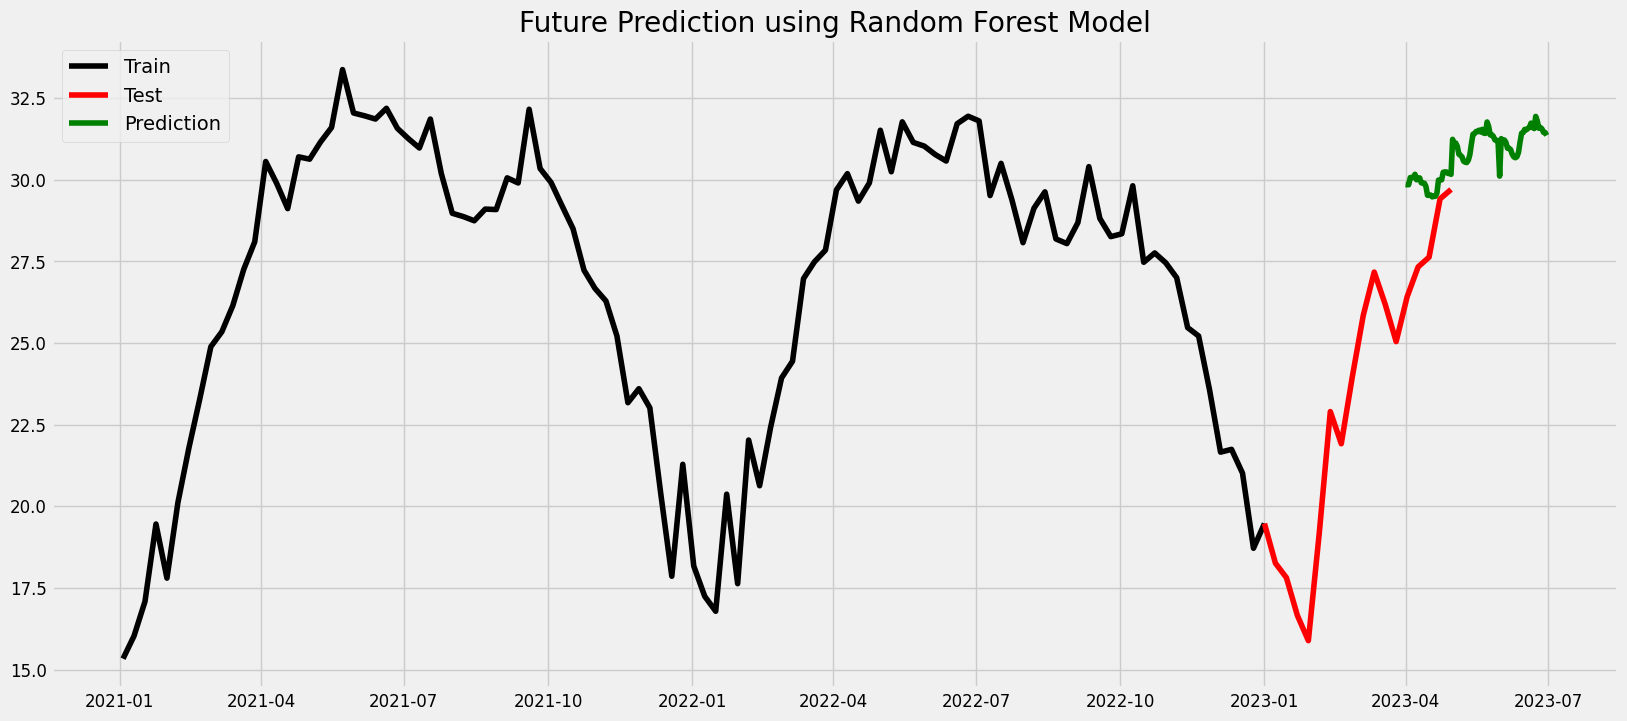

In [67]:
from sklearn.ensemble import RandomForestRegressor
futureX = pd.date_range(start='04/01/2023', end='30/06/2023', freq='D')
tmonths = [x.month for x in futureX]
tyears = [x.year for x in futureX]
tday = [x.day for x in futureX]

# convert into one matrix
testX = np.array([tday, tmonths, tyears]).T

# fit the model
rfmodel = RandomForestRegressor()
rfmodel.fit(trainX, trainY)

# predict on the same period
preds = rfmodel.predict(testX)

# plot what has been learned
plt.plot(trainData.index, trainData.values, color="black", label='Train')
plt.plot(testData.index, testData.values, color="red", label='Test')
plt.plot(futureX, preds, color="green", label='Prediction')
plt.title("Future Prediction using Random Forest Model")
plt.legend()
plt.show()
#  rf_rmse = n


<h3>Question-11</h3>
Visualize the predictions from 9 and 10 and discuss their differences.

<h3>Answer </h3>
The visualization is above in the code. However there is great difference between the predictions of SARIMA and ML regression model. The predictions of Random Forest are more accurate than that of SARIMAX Model. as Machine Learning model shows the accurate prediction based on the seasonal trend of the data, whereas SARIMAX is not able to predict the seasonal trend of the data. 

```python